# Diabetes Detection

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('diabetes.csv')

In [ ]:
df.head()

,Unnamed: 0,Diabetes_binary,HighBP,High Cholesterol,Cholesterol Check,BMI,Smoker,Stroke,HeartDiseaseorAttack,Physical Activity,...,Any Health Care,No Doctor because of Cost,General Health,Mental Health,Physical Health,Difficulty Walking,Sex,Age,Education,Income
0,0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,...,1.0,0.0,Medium,5.0,30.0,0.0,male,4.0,Cat6,Cat8
1,1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,...,1.0,0.0,Medium,0.0,0.0,0.0,male,12.0,Cat6,Cat8
2,2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,...,1.0,0.0,High,0.0,10.0,0.0,male,13.0,Cat6,Cat8
3,3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,...,1.0,0.0,Medium,0.0,3.0,0.0,male,11.0,Cat6,Cat8
4,4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,...,1.0,0.0,Good,0.0,0.0,0.0,female,8.0,Cat5,Cat8


# Preprocessing

## Null

<font color='blue'>
    Find all different values present in each column
</font>

In [ ]:
for col in df:
    print(f"{col} \n {df[col].unique()}\n")
    

Unnamed: 0 
 [    0     1     2 ... 70689 70690 70691]

Diabetes_binary 
 [0. 1.]

HighBP 
 [1. 0.]

High Cholesterol 
 [0. 1.]

Cholesterol Check 
 [1. 0.]

BMI 
 [26. 28. 29. 18. 31. 32. 27. 24. 21. 58. 30. 20. 22. 38. 40. 25. 36. 47.
 19. 37. 41. 23. 34. 35. 42. 17. 33. 44. 15. 52. 69. 56. 45. 39. 92. 53.
 98. 50. 46. 79. 48. 16. 63. 72. 54. 49. 68. 43. 84. 73. 76. 55. 51. 75.
 57. 60. 12. 77. 82. 67. 71. 61. 14. 81. 59. 86. 13. 87. 65. 95. 89. 62.
 64. 66. 85. 70. 83. nan 80. 78. 74.]

Smoker 
 [0. 1.]

Stroke 
 [0. 1.]

HeartDiseaseorAttack 
 [ 0.  1. nan]

Physical Activity 
 [ 1.  0. nan]

Fruits 
 [ 0.  1. nan]

Veggies 
 [ 1.  0. nan]

Heavy Alcohol Consumption 
 [ 0.  1. nan]

Any Health Care 
 [ 1.  0. nan]

No Doctor because of Cost 
 [ 0.  1. nan]

General Health 
 ['Medium' 'High' 'Good' 'Low' 'Very Low' nan]

Mental Health 
 [ 5.  0.  7.  3.  4.  2. 30. 20.  1. 15. 10. 25. 14. 28.  6. 29. 26. 12.
 16. 22. 13.  8.  9. 21. 18. 17. 27. nan 24. 23. 11. 19.]

Physical Health 

<font color='blue'>
    Unify all missing types
</font>

In [ ]:
df.replace('Unknown', None, inplace=True)
df.replace('-', None, inplace=True)
df.replace('?', None, inplace=True)
df.isnull().sum()

Unnamed: 0                   0
Diabetes_binary              0
HighBP                       0
High Cholesterol             0
Cholesterol Check            0
BMI                          1
Smoker                       0
Stroke                       0
HeartDiseaseorAttack         1
Physical Activity            1
Fruits                       2
Veggies                      1
Heavy Alcohol Consumption    1
Any Health Care              2
No Doctor because of Cost    2
General Health               1
Mental Health                1
Physical Health              1
Difficulty Walking           2
Sex                          1
Age                          1
Education                    1
Income                       1
dtype: int64

<font color='blue'>
    Remove rows containing more than 2 missing values
</font>

In [ ]:
df = df[df.isnull().sum(axis=1) <= 2]

In [ ]:
df.isnull().sum()

Unnamed: 0                   0
Diabetes_binary              0
HighBP                       0
High Cholesterol             0
Cholesterol Check            0
BMI                          1
Smoker                       0
Stroke                       0
HeartDiseaseorAttack         0
Physical Activity            0
Fruits                       1
Veggies                      0
Heavy Alcohol Consumption    0
Any Health Care              1
No Doctor because of Cost    1
General Health               0
Mental Health                0
Physical Health              0
Difficulty Walking           1
Sex                          0
Age                          0
Education                    0
Income                       0
dtype: int64

<font color='blue'>
    Find NaNs and replace them by either the mean(numerical) or the mode(categorical and binary) of that column. <br>
    By doing so we can keep and refine the dataset with out removing any data
</font>

In [ ]:
df["BMI"].fillna(df['BMI'].mean(), inplace=True)


df["Fruits"].fillna(df['Fruits'].value_counts().idxmax(), inplace=True)

df["Any Health Care"].fillna(df['Any Health Care'].value_counts().idxmax(), inplace=True)

df["No Doctor because of Cost"].fillna(df['No Doctor because of Cost'].value_counts().idxmax(), inplace=True)

df["Difficulty Walking"].fillna(df['Difficulty Walking'].value_counts().idxmax(), inplace=True)

df["Income"].fillna(df['Income'].value_counts().idxmax(), inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
df.isnull().sum()

Unnamed: 0                   0
Diabetes_binary              0
HighBP                       0
High Cholesterol             0
Cholesterol Check            0
BMI                          0
Smoker                       0
Stroke                       0
HeartDiseaseorAttack         0
Physical Activity            0
Fruits                       0
Veggies                      0
Heavy Alcohol Consumption    0
Any Health Care              0
No Doctor because of Cost    0
General Health               0
Mental Health                0
Physical Health              0
Difficulty Walking           0
Sex                          0
Age                          0
Education                    0
Income                       0
dtype: int64

## White space

<font color='blue'>
    Replace white spaces in column names
</font>

In [ ]:
df.columns = df.columns.str.replace(' ','_')
df.columns

Index(['Unnamed:_0', 'Diabetes_binary', 'HighBP', 'High_Cholesterol',
       'Cholesterol_Check', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack',
       'Physical_Activity', 'Fruits', 'Veggies', 'Heavy_Alcohol_Consumption',
       'Any_Health_Care', 'No_Doctor_because_of_Cost', 'General_Health',
       'Mental_Health', 'Physical_Health', 'Difficulty_Walking', 'Sex', 'Age',
       'Education', 'Income'],
      dtype='object')

<font color='blue'>
    Replace white spaces in the whole dataframe
</font>

In [ ]:
df.replace(' ', '_', regex=True, inplace=True)

## Normalization

In [ ]:
df.describe()

,Unnamed:_0,Diabetes_binary,HighBP,High_Cholesterol,Cholesterol_Check,BMI,Smoker,Stroke,HeartDiseaseorAttack,Physical_Activity,Fruits,Veggies,Heavy_Alcohol_Consumption,Any_Health_Care,No_Doctor_because_of_Cost,Mental_Health,Physical_Health,Difficulty_Walking,Age
count,70691.000000,70691.000000,70691.000000,70691.000000,70691.000000,70691.000000,70691.000000,70691.000000,70691.000000,70691.000000,70691.000000,70691.000000,70691.000000,70691.000000,70691.000000,70691.000000,70691.000000,70691.000000,70691.000000
mean,35345.834618,0.500007,0.563466,0.525710,0.975259,29.856995,0.475280,0.062172,0.147812,0.703032,0.611789,0.788771,0.042721,0.954959,0.093916,3.752062,5.810499,0.252734,8.584105
std,20407.117356,0.500004,0.495959,0.499342,0.155337,7.113991,0.499392,0.241469,0.354916,0.456926,0.487346,0.408183,0.202229,0.207396,0.291714,8.155682,10.062308,0.434583,2.852141
min,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,17673.500000,0.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,7.000000
50%,35346.000000,1.000000,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,9.000000
75%,53018.500000,1.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,2.000000,6.000000,1.000000,11.000000
max,70691.000000,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,30.000000,30.000000,1.000000,13.000000


<font color='blue'>
    BMI, Mental Health, Physical Health and Age need to me normalized due to their broad range
</font>

### BMI

<font color='blue'>
    We categorize BMI into 7 sections based on the standard BMI categotization. By doing so we have a normalized range of vlues
</font>

In [ ]:
df['BMI'] = pd.cut(df['BMI'], (0, 16, 18.5, 25, 30, 35, 40, np.inf), labels=[1, 2, 3, 4, 5, 6, 7]).astype('float')
df['BMI']

0        4.0
1        4.0
2        4.0
3        4.0
4        4.0
        ... 
70687    6.0
70688    4.0
70689    3.0
70690    2.0
70691    3.0
Name: BMI, Length: 70691, dtype: float64

### Mental Health, Physical Health, Age

<font color='blue'>
    These columns contain values ranging from 0 to 30 or 13 for Age. I used min-max normalization to change their range into 0-1 so that the whole dataset is unified.
</font>

In [ ]:
df['Mental_Health'] = (df['Mental_Health']-df['Mental_Health'].min())/(df['Mental_Health'].max()-df['Mental_Health'].min())
df['Physical_Health'] = (df['Physical_Health']-df['Physical_Health'].min())/(df['Physical_Health'].max()-df['Physical_Health'].min())
df['Age'] = (df['Age']-df['Age'].min())/(df['Age'].max()-df['Age'].min())


In [ ]:
df.describe()

,Unnamed:_0,Diabetes_binary,HighBP,High_Cholesterol,Cholesterol_Check,BMI,Smoker,Stroke,HeartDiseaseorAttack,Physical_Activity,Fruits,Veggies,Heavy_Alcohol_Consumption,Any_Health_Care,No_Doctor_because_of_Cost,Mental_Health,Physical_Health,Difficulty_Walking,Age
count,70691.000000,70691.000000,70691.000000,70691.000000,70691.000000,70691.000000,70691.000000,70691.000000,70691.000000,70691.000000,70691.000000,70691.000000,70691.000000,70691.000000,70691.000000,70691.000000,70691.000000,70691.000000,70691.000000
mean,35345.834618,0.500007,0.563466,0.525710,0.975259,4.343495,0.475280,0.062172,0.147812,0.703032,0.611789,0.788771,0.042721,0.954959,0.093916,0.125069,0.193683,0.252734,0.632009
std,20407.117356,0.500004,0.495959,0.499342,0.155337,1.200387,0.499392,0.241469,0.354916,0.456926,0.487346,0.408183,0.202229,0.207396,0.291714,0.271856,0.335410,0.434583,0.237678
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17673.500000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.500000
50%,35346.000000,1.000000,1.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.666667
75%,53018.500000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.066667,0.200000,1.000000,0.833333
max,70691.000000,1.000000,1.000000,1.000000,1.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## One-Hot-Encode Categorical Values

In [ ]:
categorical = ['General_Health','Sex', 'Education', 'Income']

<font color='blue'>
    These 4 columns appear in categorical forms. we have to change them into one-hot encoding
</font>

In [ ]:
df = pd.get_dummies(df, columns=categorical)

In [ ]:
df

,Unnamed:_0,Diabetes_binary,HighBP,High_Cholesterol,Cholesterol_Check,BMI,Smoker,Stroke,HeartDiseaseorAttack,Physical_Activity,...,Education_Cat5,Education_Cat6,Income_Cat1,Income_Cat2,Income_Cat3,Income_Cat4,Income_Cat5,Income_Cat6,Income_Cat7,Income_Cat8
0,0,0.0,1.0,0.0,1.0,4.0,0.0,0.0,0.0,1.0,...,0,1,0,0,0,0,0,0,0,1
1,1,0.0,1.0,1.0,1.0,4.0,1.0,1.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,1
2,2,0.0,0.0,0.0,1.0,4.0,0.0,0.0,0.0,1.0,...,0,1,0,0,0,0,0,0,0,1
3,3,0.0,1.0,1.0,1.0,4.0,1.0,0.0,0.0,1.0,...,0,1,0,0,0,0,0,0,0,1
4,4,0.0,0.0,0.0,1.0,4.0,1.0,0.0,0.0,1.0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,70687,1.0,0.0,1.0,1.0,6.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
70688,70688,1.0,0.0,1.0,1.0,4.0,1.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,1,0,0
70689,70689,1.0,1.0,1.0,1.0,3.0,0.0,0.0,1.0,0.0,...,0,1,0,0,0,1,0,0,0,0
70690,70690,1.0,1.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0


# Seperate Label and Data

In [ ]:
Diabetes_binary = df["Diabetes_binary"]
df.drop(["Unnamed:_0", "Diabetes_binary"], axis=1, inplace=True)

In [ ]:
Diabetes_binary

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
70687    1.0
70688    1.0
70689    1.0
70690    1.0
70691    1.0
Name: Diabetes_binary, Length: 70691, dtype: float64

# Buildind the XGBoost Classifier

In [ ]:
!pip install xgboost
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import xgboost
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, log_loss


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
X = df
Y = Diabetes_binary

In [ ]:

X

,HighBP,High_Cholesterol,Cholesterol_Check,BMI,Smoker,Stroke,HeartDiseaseorAttack,Physical_Activity,Fruits,Veggies,...,Education_Cat5,Education_Cat6,Income_Cat1,Income_Cat2,Income_Cat3,Income_Cat4,Income_Cat5,Income_Cat6,Income_Cat7,Income_Cat8
0,1.0,0.0,1.0,4.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0,1,0,0,0,0,0,0,0,1
1,1.0,1.0,1.0,4.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0,1,0,0,0,0,0,0,0,1
2,0.0,0.0,1.0,4.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0,1,0,0,0,0,0,0,0,1
3,1.0,1.0,1.0,4.0,1.0,0.0,0.0,1.0,1.0,1.0,...,0,1,0,0,0,0,0,0,0,1
4,0.0,0.0,1.0,4.0,1.0,0.0,0.0,1.0,1.0,1.0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,0.0,1.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,1,0,0,0,0,0,0,0
70688,0.0,1.0,1.0,4.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0,0,0,0,0,0,0,1,0,0
70689,1.0,1.0,1.0,3.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0,1,0,0,0,1,0,0,0,0
70690,1.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0


<font color='blue'>
    80 % of data wil be used for training and 20 % for test
</font>

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

### Initiate the Model

In [ ]:
model = XGBClassifier(
            tree_method='gpu_hist',
            Learning_rate=0.1,
            Max_depth=4,
            N_estimator=200,
            Subsample=0.5,
            Colsample_bytree=1,
            Random_seed=123,
            Eval_metric='auc',
            Verbosity=1)

### Train

In [ ]:
eval_set = [(x_test, y_test)]
model.fit(x_train, y_train, early_stopping_rounds=10,  eval_set=eval_set, verbose=True)

### Results

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [ ]:
def show_res(actual, predicted, color):
  acc = accuracy_score(actual, predicted)
  recall = recall_score(actual, predicted)
  precision = precision_score(actual, predicted)
  print(f" Accuracy => {acc}\n Recall => {recall}\n Precision => {precision}")
  conf_matrix = confusion_matrix(y_true=actual, y_pred=predicted)
  
  # Print the confusion matrix using Matplotlib
  fig, ax = plt.subplots(figsize=(5, 5))
  ax.matshow(conf_matrix, cmap=color, alpha=0.3)
  for i in range(conf_matrix.shape[0]):
      for j in range(conf_matrix.shape[1]):
          ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
  
  plt.xlabel('Predictions', fontsize=18)
  plt.ylabel('Actuals', fontsize=18)
  plt.title('Confusion Matrix', fontsize=18)
  plt.show()

### Test Set

 Accuracy => 0.7538015418346418
 Recall => 0.7963224893917963
 Precision => 0.7339329943944727


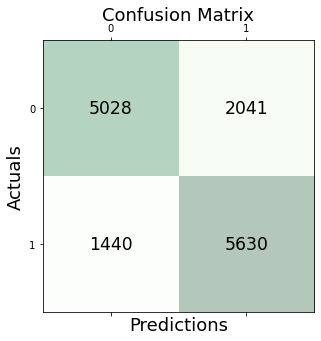

In [ ]:
show_res(y_test, model.predict(x_test), 'Greens')

### Train Set

 Accuracy => 0.7504243881737163
 Recall => 0.793181496675626
 Precision => 0.7306965530722617


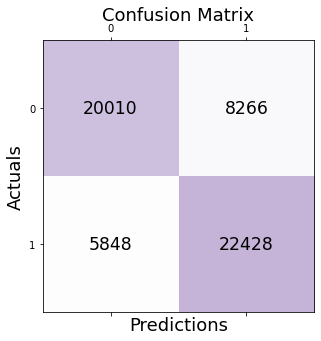

In [ ]:
show_res(y_train, model.predict(x_train), 'Purples')

# Hyperparameter Tuning

In [ ]:
xgboost.XGBClassifier().get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'binary:logistic',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}

In [ ]:
params_dict={
          'learning_rate_list' : [0.02, 0.05, 0.1, 0.3],
          'max_depth_list' : [2, 3, 4], 
          'n_estimators_list' : [100, 200, 300], 
          'colsample_bytree' : [0.8, 1]
}

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
def my_roc_auc_score(model, X, y): 
  return roc_auc_score(y, model.predict_proba(X)[:,1])

In [ ]:
from sklearn.model_selection import KFold, cross_val_score, train_test_split, StratifiedKFold, GridSearchCV

In [ ]:
tuning_model = XGBClassifier(tree_method='gpu_hist',
                             random_state = 42,
                            eval_metric='auc',
                            # use_label_encoder=False,
                            Subsample=0.5
                            )

In [ ]:
kfold = StratifiedKFold(n_splits=3,
                        shuffle=True,
                        random_state=42)

grid_search = GridSearchCV(tuning_model,
                            params_dict,
                            scoring=my_roc_auc_score,
                            cv=kfold)

In [ ]:
grid_result = grid_search.fit(x_train, y_train)

print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")
best_params = grid_result.best_params_
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']



Best: 0.827831324881323 using {'colsample_bytree': 0.8, 'learning_rate_list': 0.02, 'max_depth_list': 2, 'n_estimators_list': 100}


<font color='blue'>
    Here we found the best parameters for our model
</font>

## Results

In [ ]:
best_model = XGBClassifier( 
                            tree_method='gpu_hist',
                            **grid_result.best_params_,
                            Random_seed=123,
                            eval_metric='auc',
                            Subsample=0.5,
                            )


In [ ]:
eval_set = [(x_test, y_test)]
best_model.fit(x_train, y_train, early_stopping_rounds=10,  eval_set=eval_set, verbose=True)

## Test Results

 Accuracy => 0.7547917108706415
 Recall => 0.7900990099009901
 Precision => 0.7380103051922314


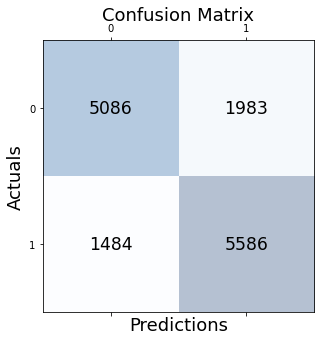

In [ ]:
show_res(y_test, best_model.predict(x_test), 'Blues')

## Test Results

 Accuracy => 0.7524755976800113
 Recall => 0.791342481256189
 Precision => 0.7342652753166634


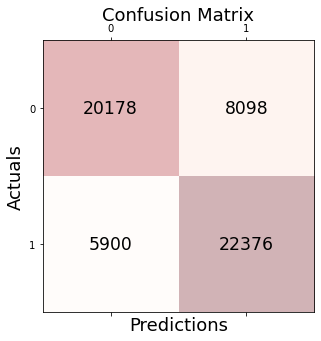

In [ ]:
show_res(y_train, best_model.predict(x_train), 'Reds')

<font color='blue'>
    We used our Best Parameters to do another classification based on them. ALthough the parameters are different the change in the accuracy and other metrics very minimal because the initial parameters were ok and also the data is well parametrized.
</font>

# Plotting Parameters Effects

In [ ]:
acc_dict = {}
for key in params_dict.keys():
  temp_list = []
  parameters = {
        'tree_method' : 'gpu_hist',
        'colsample_bytree' : 0.8, 
        "learning_rate_list" : 0.02,
        'max_depth_list': 2, 
        'n_estimators_list': 100,
        'Random_seed':123,
        'eval_metric':'auc',
        'Subsample':0.5,
    }
  for val in params_dict[key]:
    if key in parameters.keys():
      parameters[key] = val
    sample_model = XGBClassifier( 
                              **parameters
                              )
    
    eval_set = [(x_test, y_test)]
    sample_model.fit(x_train, y_train, early_stopping_rounds=10,  eval_set=eval_set, verbose=True)
    temp_list.append(accuracy_score(y_test, sample_model.predict(x_test)))

  acc_dict[key] = temp_list

### Accuracy

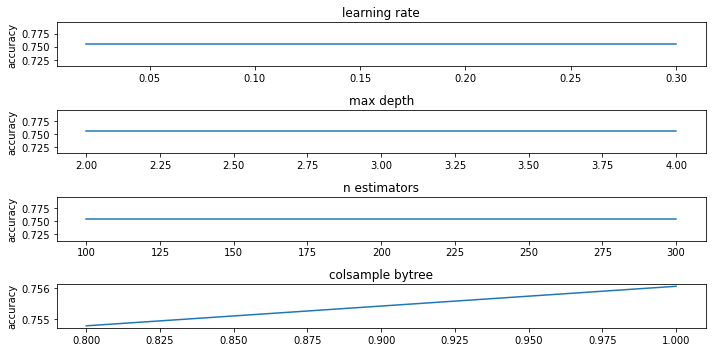

In [ ]:
fig = plt.figure()


ax1 = fig.add_subplot(411)
ax1.set_ylabel('accuracy')
ax1.set_title('learning rate')

line, = ax1.plot(params_dict['learning_rate_list'], acc_dict['learning_rate_list'])


ax2 = fig.add_subplot(412)
ax2.set_ylabel('accuracy')
ax2.set_title('max depth')

line, = ax2.plot(params_dict['max_depth_list'], acc_dict['max_depth_list'])

ax3 = fig.add_subplot(413)
ax3.set_ylabel('accuracy')
ax3.set_title('n estimators')

line, = ax3.plot(params_dict['n_estimators_list'], acc_dict['n_estimators_list'])


ax4 = fig.add_subplot(414)
ax4.set_ylabel('accuracy')
ax4.set_title('colsample bytree')

line, = ax4.plot(params_dict['colsample_bytree'], acc_dict['colsample_bytree'])

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

fig.set_figheight(5)
fig.set_figwidth(10)

fig.tight_layout()
plt.show()

<font color='blue'>
    As stated above changing the parameters does not have a large shift in the accuracy or other metrics because the dataset is clean and well parametrized and not very complicated.
</font>

### Mean Score

In [ ]:
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

In [ ]:
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
import copy

In [ ]:
lr_score = {}
copy_res = copy.deepcopy(grid_result.best_params_)
copy_res.pop('learning_rate_list')

for i, value in zip(means, params):
  copy_value = copy.deepcopy(value)
  copy_value.pop('learning_rate_list')
  if copy_res == copy_value:
    lr_score[value['learning_rate_list']] = i

lr_score

{0.02: 0.827831324881323,
 0.05: 0.827831324881323,
 0.1: 0.827831324881323,
 0.3: 0.827831324881323}

Text(0.5, 0, 'learning_rate')

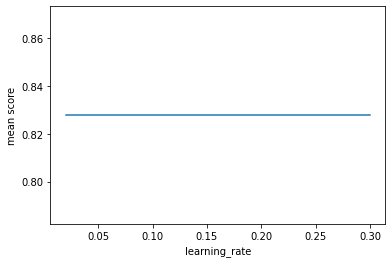

In [ ]:
plt.plot(list(lr_score.keys()), list(lr_score.values()))
plt.ylabel('mean score')
plt.xlabel('learning_rate')

In [ ]:
ne_score = {}
copy_res = copy.deepcopy(grid_result.best_params_)
copy_res.pop('n_estimators_list')

for i, value in zip(means, params):
  copy_value = copy.deepcopy(value)
  copy_value.pop('n_estimators_list')
  if copy_res == copy_value:
    ne_score[value['n_estimators_list']] = i

ne_score

{100: 0.827831324881323, 200: 0.827831324881323, 300: 0.827831324881323}

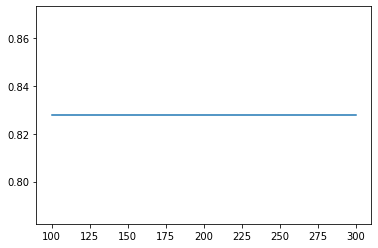

In [ ]:
plt.plot(list(ne_score.keys()), list(ne_score.values()))
plt.ylabel('mean score')
plt.xlabel('n_estimators')

In [ ]:
md_score = {}
copy_res = copy.deepcopy(grid_result.best_params_)
copy_res.pop('max_depth_list')

for i, value in zip(means, params):
  copy_value = copy.deepcopy(value)
  copy_value.pop('max_depth_list')
  if copy_res == copy_value:
    md_score[value['max_depth_list']] = i

md_score

{2: 0.827831324881323, 3: 0.827831324881323, 4: 0.827831324881323}

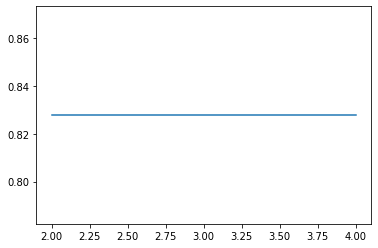

In [ ]:
plt.plot(list(md_score.keys()), list(md_score.values()))
plt.ylabel('mean score')
plt.xlabel('max_depth')

In [ ]:
cb_score = {}
copy_res = copy.deepcopy(grid_result.best_params_)
copy_res.pop('colsample_bytree')

for i, value in zip(means, params):
  copy_value = copy.deepcopy(value)
  copy_value.pop('colsample_bytree')
  if copy_res == copy_value:
    cb_score[value['colsample_bytree']] = i

cb_score

{0.8: 0.827831324881323, 1: 0.827794186241678}

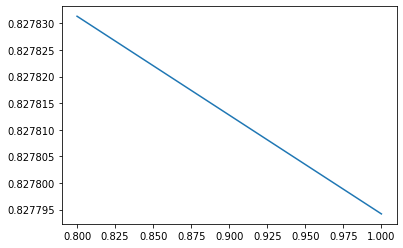

In [ ]:
plt.plot(list(cb_score.keys()), list(cb_score.values()))
plt.ylabel('mean score')
plt.xlabel('max_depth')